In [1]:
import pandas as pd

PATH="data\\UCI HAR Dataset\\"
#y_data = pd.read_csv(PATH+"\\train\\y_train.txt",sep=' ')   
har_features = pd.read_csv(PATH+"features.txt",sep=' ',names=['id','features'])
har_labels = pd.read_csv(PATH+"activity_labels.txt",sep=' ',names=['id','labels'])

# read train data from dataset
X_train = pd.read_csv(PATH+"train\\X_train.txt",sep='\s+',header=None)
y_train = pd.read_csv(PATH+"train\\y_train.txt",sep="\s+",names=['labels'])

# read test data from dataset
X_test = pd.read_csv(PATH+"test\\X_test.txt",sep='\s+',header=None)
y_test = pd.read_csv(PATH+"test\\y_test.txt",sep="\s+",names=['labels'])

# make sample data for choosing n_component 
har_data_train = pd.concat([X_train,y_train],axis=1)
har_data_samples = har_data_train.sample(frac=0.3)
har_data_samples

,0,1,2,3,4,5,6,7,8,9,...,552,553,554,555,556,557,558,559,560,labels
3440,0.275285,-0.020033,-0.112307,-0.998246,-0.993290,-0.988100,-0.998289,-0.992716,-0.987735,-0.943390,...,-0.435018,-0.774087,-0.012459,0.265771,0.887486,0.249724,-0.703670,0.298065,0.062649,5
5641,0.241804,-0.034113,-0.095074,0.164414,0.046262,-0.290380,0.105294,-0.076767,-0.300975,0.453740,...,-0.246511,-0.620092,0.341759,-0.129439,-0.832936,-0.955256,-0.853542,0.138520,-0.079859,3
1795,0.280298,-0.017495,-0.109474,-0.992638,-0.991802,-0.980449,-0.992210,-0.991753,-0.978726,-0.937483,...,-0.760093,-0.935535,-0.258145,-0.104487,0.039170,0.478373,-0.487528,-0.077284,-0.297800,4
356,0.286433,-0.023843,-0.122738,-0.915584,-0.710794,-0.880226,-0.932429,-0.720314,-0.881657,-0.789914,...,-0.357772,-0.752582,-0.217502,0.229826,0.154791,-0.431134,-0.761361,0.250580,-0.046895,5
7241,0.282697,-0.019393,-0.106813,-0.984411,-0.959988,-0.972931,-0.986409,-0.960552,-0.976187,-0.921642,...,-0.028569,-0.392738,0.230057,-0.752418,-0.550051,-0.558499,0.515761,-0.550524,-0.450321,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7207,0.285267,-0.017716,-0.112932,-0.996210,-0.995929,-0.996503,-0.996469,-0.995990,-0.996394,-0.935258,...,-0.537412,-0.776738,-0.059678,0.445701,-0.227115,0.327626,-0.233064,-0.236545,-0.375200,4
410,0.274087,-0.014714,-0.114806,-0.987131,-0.966899,-0.980048,-0.987893,-0.966435,-0.979154,-0.930330,...,-0.481582,-0.792180,0.107597,-0.519256,0.342103,-0.004762,0.478692,-0.531477,-0.465078,6
2201,0.247035,-0.124237,-0.124128,-0.194870,0.044316,-0.109676,-0.258923,0.059906,-0.031925,-0.026529,...,-0.352403,-0.700490,-0.083036,0.727475,0.961428,-0.484472,-0.710322,0.279703,-0.068131,2
6576,0.188372,-0.017019,-0.096986,-0.256390,-0.103186,-0.427431,-0.295420,-0.095189,-0.428690,-0.170726,...,-0.269372,-0.697449,0.880451,0.164316,-0.403638,0.109916,-0.751637,0.238740,0.119317,1


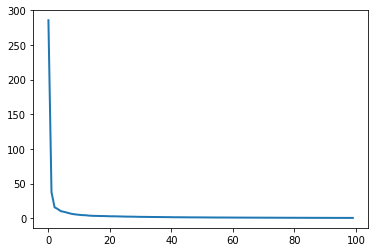

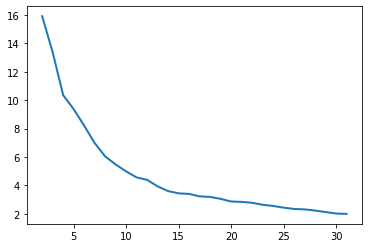

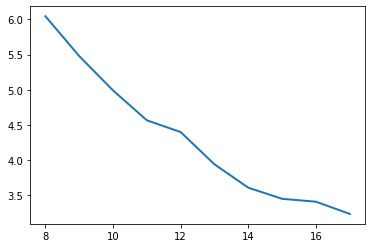

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing      import StandardScaler
from sklearn.decomposition      import PCA

X_samples=har_data_samples[har_data_samples.columns.difference(['labels'])]
y_samples=har_data_samples['labels']
scale = StandardScaler().fit_transform(X_samples)
pca = PCA(n_components=561)
pca = pca.fit(scale)

# sort by DESC
rank = np.sort(pca.explained_variance_)[::-1]
#print(rank)

# checking Scree Plot
sns.lineplot(range(0,100),rank[:100],linewidth=2)
plt.show()
sns.lineplot(range(2,32),rank[2:32],linewidth=2)
plt.show()
sns.lineplot(range(8,18),rank[8:18],linewidth=2)
plt.show()

In [3]:
from sklearn.pipeline           import Pipeline
from sklearn.preprocessing      import StandardScaler
from sklearn.decomposition      import PCA
from sklearn.svm                import SVC
from sklearn.linear_model       import LogisticRegression
from sklearn.ensemble           import RandomForestClassifier
from sklearn.model_selection    import GridSearchCV

pipeline = Pipeline([
    ("scale"          , StandardScaler()),
    ("pca"            , PCA(n_components=15)), 
    ("classifier"     , SVC())
])

C_PARMS     = [0.001, 0.01, 0.1, 1, 10, 100]
GAMMA_PARMS = [0.001, 0.01, 0.1, 1, 10, 100]

param_grid = [
    {
        'classifier'        : [SVC(random_state=0)],
        'classifier__C'     : C_PARMS,
        'classifier__gamma' : GAMMA_PARMS
    },
    {
        'classifier'         : [RandomForestClassifier(random_state=0)],
        'classifier__n_estimators' : C_PARMS
    },
    {
        'classifier'    : [ LogisticRegression(random_state=0)],
        'classifier__C' : C_PARMS
    }
]

grid = GridSearchCV(pipeline, param_grid=param_grid, cv=5, n_jobs=-2)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('pca', PCA(n_components=15)),
                                       ('classifier', SVC())]),
             n_jobs=-2,
             param_grid=[{'classifier': [SVC(C=10, gamma=0.001,
                                             random_state=0)],
                          'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
                         {'classifier': [RandomForestClassifier(random_state=0)],
                          'classifier__n_estimators': [0.001, 0.01, 0.1, 1, 10,
                                                       100]},
                         {'classifier': [LogisticRegression(random_state=0)],
                          'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]}])

In [4]:
print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

Best params:
{'classifier': SVC(C=10, gamma=0.001, random_state=0), 'classifier__C': 10, 'classifier__gamma': 0.001}

Best cross-validation score: 0.86
Test-set score: 0.86


In [5]:
result_data = pd.DataFrame(grid.cv_results_)
result_data[(result_data.rank_test_score <=3)]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier,param_classifier__C,param_classifier__gamma,param_classifier__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
24,1.513401,0.111438,0.721800,0.038479,"SVC(C=10, gamma=0.001, random_state=0)",10,0.001,NaN,"{'classifier': SVC(C=10, gamma=0.001, random_s...",0.848402,0.832087,0.868027,0.847619,0.904762,0.860180,0.025039,1
30,1.513008,0.022838,0.571809,0.052974,"SVC(C=10, gamma=0.001, random_state=0)",100,0.001,NaN,"{'classifier': SVC(C=10, gamma=0.001, random_s...",0.848402,0.812373,0.869388,0.862585,0.899320,0.858414,0.028394,3
44,2.058401,0.149115,0.058199,0.013555,LogisticRegression(random_state=0),0.1,NaN,NaN,{'classifier': LogisticRegression(random_state...,0.849762,0.815092,0.868707,0.852381,0.908844,0.858957,0.030449,2


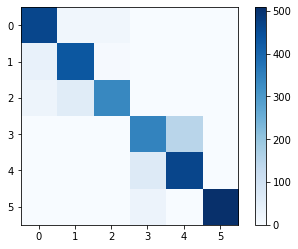

In [6]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

y_pred = grid.predict(X_test)
cm = confusion_matrix(y_test,y_pred)

plt.figure()
plt.imshow(cm, interpolation='nearest',cmap=plt.cm.Blues)
plt.colorbar()